## Table of contents
A. [Preprocessing](#A.-Preprocessing)
1.  [Import Data](#1.-Import-Data)
2.  [Transform Data](#2.-Transform-Data)

B. [EDA](#B.-EDA)
1. [Volume](#I.-Volume)
2. [Number of Transactions](#II.-Number-of-Transactions)
3. [Average Volume per Transaction](#III.-Average-Volume-per-Transaction)
4. [Krystal Wallets](#IV.-Krystal-Wallets)
5. [Conclusion](#V.-Conclusion)

# A. Preprocessing

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

## 1. Import Data

Để phân tích ảnh hưởng của Toàn bộ Market tới sự suy giảm Khối lượng giao dịch của sản Krystal, ta trích xuất dữ liệu về Khối lượng giao dịch của Market <code>dex_data</code> và của Sàn <code>raw_data</code>.

In [2]:
dex_data = pd.read_csv('DEX_daily.csv', header=[0])
raw_data = pd.read_excel('raw_data.xlsx', header=[0])

Đưa trường dữ liệu <code>date</code> từ cả 2 bảng dữ liệu về cùng datatype

In [3]:
dex_data['date'] = pd.to_datetime(dex_data['date']).dt.date
raw_data['date'] = pd.to_datetime(raw_data['time'], unit='s').dt.date

In [4]:
dex_data.head()

,date,txn,volume
0,2022-01-01,51390,2.656818e+09
1,2022-01-02,51633,2.184683e+09
2,2022-01-03,52465,2.820679e+09
3,2022-01-04,52495,2.972148e+09
4,2022-01-05,52248,4.344361e+09


In [5]:
raw_data

,from,to,source_token,dest_token,time,platform,fee_usd,volume_usd,date
0,0x44537beefda25503da0317628298c6c8369b3ee3,0x70270C228c5B4279d1578799926873aa72446CcD,0x4A7397B0b86bB0f9482A3f4F16DE942f04E88702,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1648197188,k-ios,0.936914,1169.102960,2022-03-25
1,0xb7cb9ad04693b61b960077c41054e95f679b838e,0x70270C228c5B4279d1578799926873aa72446CcD,0x1E4EDE388cbc9F4b5c79681B7f94d36a11ABEBC9,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1645157103,k-web,0.660574,981.482371,2022-02-18
2,0x30661431d04982a4bc736bfaab828454265443be,0x70270C228c5B4279d1578799926873aa72446CcD,0x549020a9Cb845220D66d3E9c6D9F9eF61C981102,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1646664388,k-web,0.171142,231.145962,2022-03-07
3,0xecc81c21a307adfd7b9d8d10924140dd77295e10,0x70270C228c5B4279d1578799926873aa72446CcD,0x0E5C8C387C5EBa2eCbc137aD012aeD5Fe729e251,0xdAC17F958D2ee523a2206206994597C13D831ec7,1653387868,k-web,1.120242,1400.301989,2022-05-24
4,0x0b5fe588e5738a0bb9df4491a1529256d6a11c1b,0x70270C228c5B4279d1578799926873aa72446CcD,0xD567B5F02b9073aD3a982a099a23Bf019FF11d1c,0xdAC17F958D2ee523a2206206994597C13D831ec7,1656359522,k-ios,0.562811,703.513790,2022-06-27
...,...,...,...,...,...,...,...,...,...
153805,0xa398ed016b731f4f52422d049749097772af1e1b,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0xc7198437980c041c805A1EDcbA50c1Ce5db95118,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1648363265,k-web,1.166544,1457.013612,2022-03-27
153806,0xb4cf2ea0020d2c05c8e40bda9c47395c18a77df3,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x8B1d98A91F853218ddbb066F20b8c63E782e2430,0xA7D7079b0FEaD91F3e65f86E8915Cb59c1a4C664,1641030195,k-web,0.000000,0.000000,2022-01-01
153807,0x1efc3c9d34c92e8711bb4def4236870533f085a4,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x1DB749847C4abB991d8B6032102383e6BfD9B1c7,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1645438976,k-web,0.037241,46.514554,2022-02-21
153808,0x10e1e4dccbe012913f92d06e09ef3442e7ebd31f,0x8C27aBf05DE1d4847c3924566C3cBAFec6eFb42A,0x96d58F4646e988c236A4d2Bf57A0468E16E2DDFc,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,1647573360,k-web,0.032800,40.966867,2022-03-18


## 2. Transform Data

Ta nhận thấy trong dữ liệu giao dịch của Sàn <code>raw_data</code>, mỗi ngày có rất nhiều giao dịch riêng lẻ, và mỗi khách hàng lại có rất nhiều giao dịch.

Vì vậy, để dễ dàng phân tích xu hướng của Khối lượng giao dịch trên sàn, ta đưa dự liệu về dạng time series, bằng cách:
<ul>
    <li>Aggregate Sum Khối lượng giao dịch theo Date</li>
    <li>Aggregate Count Số giao dịch theo Date</li>
    <li>Aggregate Count Distinct số Wallet theo Date để tìm số Unique Wallet có giao dịch trong ngày</li>
</ul>

In [6]:
# Aggregate Count Unique Wallet by Date
wallet = raw_data[['from', 'date']]
wallet = wallet.groupby(['date'],as_index=False).nunique()

# Aggregate Count Number of Transaction at Krystal by Date
txn = raw_data[['from', 'date']]
txn = txn.groupby(['date'],as_index=False).size()

# Aggregate Sum Transaction Volume at Krystal by Date
volume = raw_data.groupby(['date'], as_index=False).sum()

# Merge data
raw_data = wallet.merge(volume, how='outer')
raw_data = raw_data.merge(txn, how='outer')
raw_data.drop(columns=['time'], inplace=True)
raw_data.head()

,date,from,fee_usd,volume_usd,size
0,2022-01-01,118,297.109940,3.713406e+05,279
1,2022-01-02,137,250.577714,4.076614e+05,370
2,2022-01-03,291,1468.805582,1.860128e+06,1067
3,2022-01-04,271,2159.212958,2.855317e+06,1205
4,2022-01-05,395,1430.436559,1.838224e+06,1083


#### Ta tiến hành tính toán các trường dữ liệu cần thiết cho phân tích sau này.

In [7]:
df = dex_data.merge(raw_data, how='outer')
df.columns = ['date', 'dex_txn', 'dex_vol', 'unique_wal', 'plat_fee', 'plat_vol', 'plat_txn']
df['dex_vol/txn'] = df['dex_vol']/df['dex_txn']
df['plat_vol/txn'] = df['plat_vol']/df['plat_txn']
df['plat_vol/wallet'] = df['plat_vol']/df['unique_wal']
df.set_index("date", inplace=True)
df

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
date,,,,,,,,,
2022-01-01,51390,2.656818e+09,118,297.109940,3.713406e+05,279,51699.120704,1330.969975,3146.954433
2022-01-02,51633,2.184683e+09,137,250.577714,4.076614e+05,370,42311.762787,1101.787484,2975.630430
2022-01-03,52465,2.820679e+09,291,1468.805582,1.860128e+06,1067,53763.053788,1743.325214,6392.192451
2022-01-04,52495,2.972148e+09,271,2159.212958,2.855317e+06,1205,56617.730260,2369.557614,10536.224813
2022-01-05,52248,4.344361e+09,395,1430.436559,1.838224e+06,1083,83148.838348,1697.344165,4653.730964
...,...,...,...,...,...,...,...,...,...
2022-07-18,34680,2.825296e+09,225,364.196949,4.624516e+05,526,81467.579902,879.185583,2055.340519
2022-07-19,34507,3.103658e+09,588,2048.585160,3.460724e+06,2565,89942.863042,1349.210153,5885.585108
2022-07-20,34374,2.673336e+09,1060,2845.414275,4.396414e+06,3546,77772.043783,1239.823456,4147.560353


#### Giải thích các biến:
<br><code>date</code>: date
<br><code>dex_txn</code>: Số lượng giao dịch trong ngày của thị trường
<br><code>dex_vol</code>: khối lượng giao dịch trong ngày của thị trường
<br><code>unique_wal</code>: Số Ví thực hiện giao dịch trong ngày
<br><code>plat_txn</code>: Số lượng giao dịch trong ngày của sàn
<br><code>plat_vol</code>: khối lượng giao dịch trong ngày của sàn
<br><code>dex_vol/txn</code>: khối lượng trên mỗi giao dịch của thị trường
<br><code>plat_vol/txn</code>: khối lượng trên mỗi giao dịch của sàn
<br><code>plat_vol/wallet</code>: khối lượng giao dịch trên mỗi Ví của sàn

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 2022-01-01 to 2022-07-22
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dex_txn          203 non-null    int64  
 1   dex_vol          203 non-null    float64
 2   unique_wal       203 non-null    int64  
 3   plat_fee         203 non-null    float64
 4   plat_vol         203 non-null    float64
 5   plat_txn         203 non-null    int64  
 6   dex_vol/txn      203 non-null    float64
 7   plat_vol/txn     203 non-null    float64
 8   plat_vol/wallet  203 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 15.9+ KB


In [9]:
df.describe()

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
count,203.000000,2.030000e+02,203.000000,203.000000,2.030000e+02,203.000000,203.000000,203.000000,203.000000
mean,36969.088670,2.750305e+09,340.857143,887.952874,1.240946e+06,757.684729,74706.989131,1244.168355,3175.221191
std,8160.733526,1.539339e+09,573.154960,1916.054689,2.536926e+06,1153.723850,39149.791405,1245.624189,4073.492497
min,9829.000000,3.203131e+08,5.000000,0.595549,7.467079e+02,8.000000,30079.031486,20.131379,22.004066
25%,30022.000000,1.948704e+09,31.000000,17.277242,2.931766e+04,65.000000,54249.858820,331.119767,597.771824
50%,38143.000000,2.493214e+09,137.000000,179.540030,2.756653e+05,262.000000,66841.274467,974.890072,1809.983556
75%,42560.500000,3.004101e+09,380.500000,797.628409,1.217375e+06,964.500000,81281.629961,1665.362329,4009.079763
max,57649.000000,1.251230e+10,3705.000000,13256.705767,1.657198e+07,6575.000000,345376.473391,9602.448055,30304.067423


In [10]:
df.to_csv('market.csv')

In [40]:
df

,dex_txn,dex_vol,unique_wal,plat_fee,plat_vol,plat_txn,dex_vol/txn,plat_vol/txn,plat_vol/wallet
date,,,,,,,,,
2022-01-01,51390,2.656818e+09,118,297.109940,3.713406e+05,279,51699.120704,1330.969975,3146.954433
2022-01-02,51633,2.184683e+09,137,250.577714,4.076614e+05,370,42311.762787,1101.787484,2975.630430
2022-01-03,52465,2.820679e+09,291,1468.805582,1.860128e+06,1067,53763.053788,1743.325214,6392.192451
2022-01-04,52495,2.972148e+09,271,2159.212958,2.855317e+06,1205,56617.730260,2369.557614,10536.224813
2022-01-05,52248,4.344361e+09,395,1430.436559,1.838224e+06,1083,83148.838348,1697.344165,4653.730964
...,...,...,...,...,...,...,...,...,...
2022-07-18,34680,2.825296e+09,225,364.196949,4.624516e+05,526,81467.579902,879.185583,2055.340519
2022-07-19,34507,3.103658e+09,588,2048.585160,3.460724e+06,2565,89942.863042,1349.210153,5885.585108
2022-07-20,34374,2.673336e+09,1060,2845.414275,4.396414e+06,3546,77772.043783,1239.823456,4147.560353


# B. EDA

## Market Analysis

## I. Volume

### 1. Market Volume

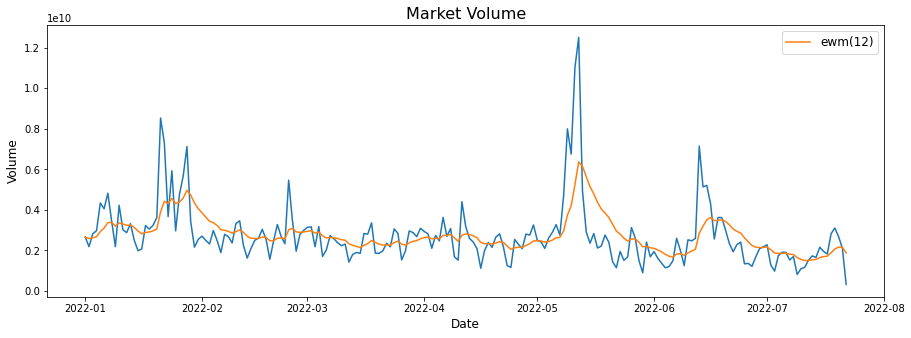

In [11]:
df_ewm = df.ewm(span=12, adjust=False).mean()

plt.figure(figsize=(15, 5))
plt.plot(df["dex_vol"])
plt.plot(df_ewm["dex_vol"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("Market Volume", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Nhìn khái quát vào biểu đồ, ta thấy Market Volume trong khoảng thời gian quan sát không có một trend rõ ràng. Tuy nhiên, có những điểm peak(outliers) mà ta cần lưu ý.

In [12]:
# Define Outliers
def detect_outliers(series):
    Q1 = np.quantile(series, 0.25)
    Q3 = np.quantile(series, 0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    lower_compare = series <= lower_bound
    upper_compare = series >= upper_bound
    outlier_idxs = np.where(lower_compare | upper_compare)[0]
    return outlier_idxs

outlier_idxs=detect_outliers(df["dex_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 7) datetime.date(2022, 1, 21)
 datetime.date(2022, 1, 22) datetime.date(2022, 1, 24)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 27)
 datetime.date(2022, 1, 28) datetime.date(2022, 2, 24)
 datetime.date(2022, 5, 8) datetime.date(2022, 5, 9)
 datetime.date(2022, 5, 10) datetime.date(2022, 5, 11)
 datetime.date(2022, 5, 12) datetime.date(2022, 5, 13)
 datetime.date(2022, 6, 13) datetime.date(2022, 6, 14)
 datetime.date(2022, 6, 15) datetime.date(2022, 7, 22)]


#### Như vậy, ta đã xác định được những khoảng thời gian xuất hiện sự gia tăng Market Volume đột biến là:
<ul>
    <li>2022/01/07</li>
    <li>2022/01/21 - 2022/01/24</li>
    <li>2022/01/26 - 2022/01/28</li>
    <li>2022/02/24</li>
    <li>2022/05/08 - 2022/05/13 (Volume cao nhất)</li>
    <li>2022/06/13 - 2022/06/15</li>
    <li>2022/07/22</li>
</ul> 

#### Trend, Seasonal, Error

Để hiểu rõ hơn biến động của Market Volume, ta tiến hành phân tích các yếu tố Trend, Seasonal, Error. Vì dữ liệu thu thập trong 7 tháng (2 quý), nên ta phân tích các yếu tố trên theo khung M1 (period=30 ngày) với model là <code>multiplicative</code>.

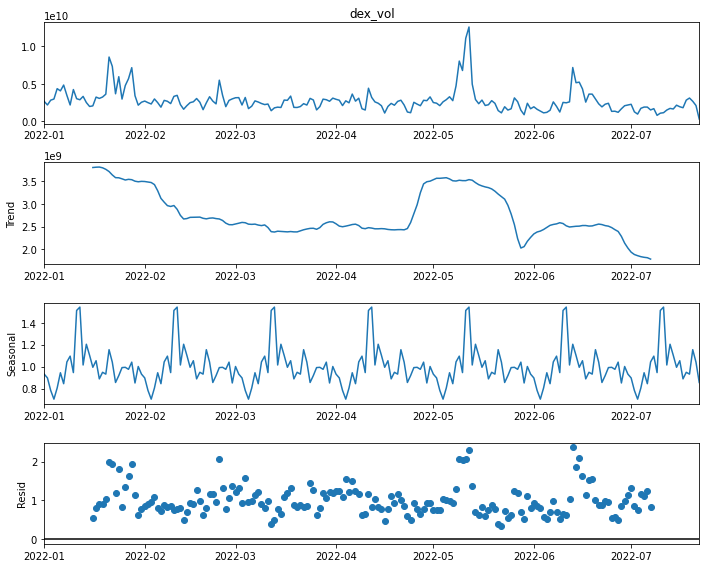

In [13]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['dex_vol'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Về Trend, Market Volume đang có xu hướng đi ngang không rõ ràng, thậm chí là giảm nhẹ. Đây là điều dễ hiểu bởi tình hình Crypto từ đầu năm 2022 đến nay đang khá ảm đạm, liên tục đón nhận các tin tức xấu. Đặc biệt Khối lượng giao dịch có hiện tượng tăng vọt vào 2022/05/08 - 2022/05/13. Khối lượng đột biến này đến từ việc các nhà giao dịch liên tục bán tháo với khối lượng lớn (sụp đổ stablecoin LUNA).

Về Seasonal, Khối lượng giao dịch có pattern tăng mạnh vào khoảng gần đầu tháng và sau đó giảm dần.

### 2. Krystal Volume

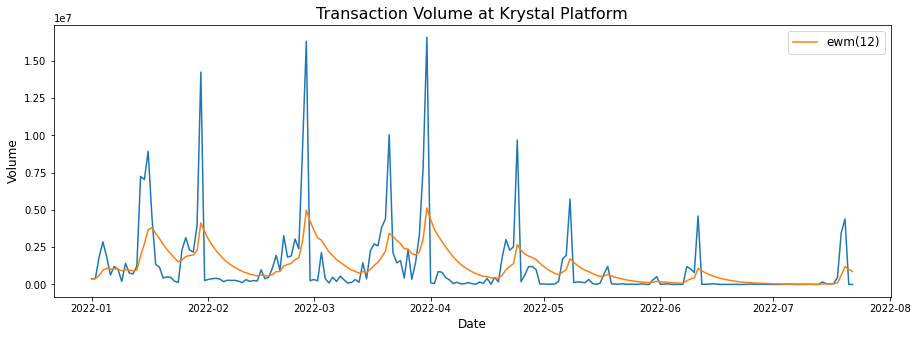

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol"])
plt.plot(df_ewm["plat_vol"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("Transaction Volume at Krystal Platform", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Nhìn khái quát, Krystal Volume đang có xu hướng giảm, rõ ràng nhất bắt đầu từ tháng 4/2022 trở đi, và xuất hiện những điểm peak vào các thời điểm: giữa tháng 1, cuối tháng 1-2-3-4-7, đầu tháng 5-6.

In [15]:
outlier_idxs=detect_outliers(df["plat_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 14) datetime.date(2022, 1, 15)
 datetime.date(2022, 1, 16) datetime.date(2022, 1, 17)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 29)
 datetime.date(2022, 1, 30) datetime.date(2022, 2, 21)
 datetime.date(2022, 2, 24) datetime.date(2022, 2, 26)
 datetime.date(2022, 2, 27) datetime.date(2022, 3, 19)
 datetime.date(2022, 3, 20) datetime.date(2022, 3, 21)
 datetime.date(2022, 3, 29) datetime.date(2022, 3, 30)
 datetime.date(2022, 3, 31) datetime.date(2022, 4, 21)
 datetime.date(2022, 4, 24) datetime.date(2022, 5, 8)
 datetime.date(2022, 6, 11) datetime.date(2022, 7, 19)
 datetime.date(2022, 7, 20)]


#### Ta đã xác định được những khoảng thời gian xuất hiện sự gia tăng Krystal Transaction Volume đột biến là:
<ul>
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/21</li>
    <li>2022/02/24</li>
    <li>2022/02/26 - 2022/02/27</li>
    <li>2022/03/19 - 2022/03/21</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul>

#### Trend, Seasonal, Error

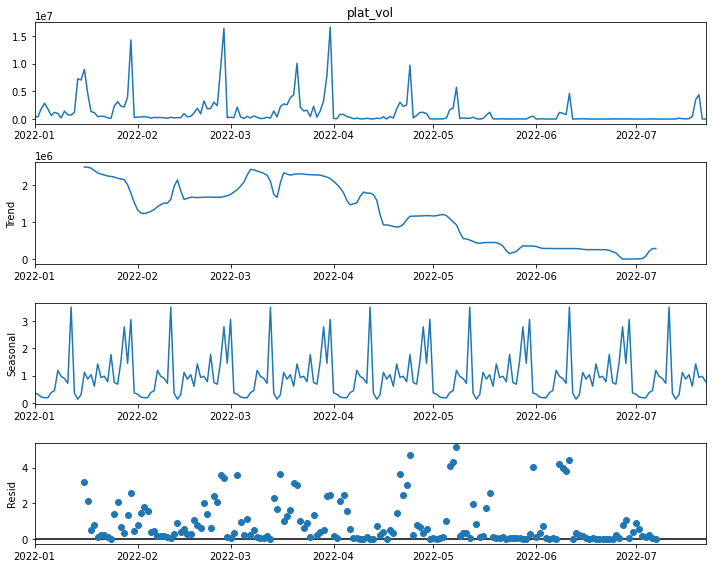

In [16]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_vol'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Về Trend, Krystal Volume đang có trend giảm. Trend giảm rõ ràng nhất bắt đầu từ tháng 4/2022 trở đi.

Về Seasonal, Krystal Volume có pattern tăng mạnh vào khoảng thời gian gần đầu tháng ,đi ngang và lại tăng mạnh cuối tháng.

### 3. Correlation

Để chắc chắn hơn về tương quan giữa Market Volume và Krystal Volume, ta tiến hành nghiên cứu hệ số Correlation giữa 2 time series này để có cái nhìn định lượng hơn.

Để tăng Correlation và tăng độ chính xác của giả thuyết, ta sẽ thêm vào 1 tham số trượt (lag). Nghĩa là để dữ liệu trên sàn Krystal đi sau thị trường 1 khoảng thời gian (n ngày) vì ta giả định thị trường có thể sẽ có tác động đến sàn nhưng không phải tức thì.

Ta chọn tham số trượt (lag) trong khoảng 1-7 ngày. Bởi đây có thể là khoảng thời gian hợp lý để các nhà giao dịch trên sàn Krystal phản ứng với biến động của thị trường chung.

Ta tiến hành đo hệ số Cross Correlation giữa 2 time series theo tham số lag cho trước.

In [17]:
def shift_time(df, lag=0):
    cols ={}
    df = df.copy()
    for i in range(1,lag+1):
        for x in list(df.columns):
            if not x in cols:
                cols[x] = ['{}_{}'.format(x, i)]
            else:
                cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1)
    return df

In [18]:
# Dịch 'Khối lượng giao dịch của toàn thị trường' về quá khứ 1-7 ngày
dex_vol_shifted = shift_time(df[['dex_vol']], 7)

df_shifted1 = pd.concat([df[['plat_vol']], dex_vol_shifted], axis=1)
df_shifted1.head(7)

,plat_vol,dex_vol,dex_vol_1,dex_vol_2,dex_vol_3,dex_vol_4,dex_vol_5,dex_vol_6,dex_vol_7
date,,,,,,,,,
2022-01-01,3.713406e+05,2.656818e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,4.076614e+05,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,1.860128e+06,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN,NaN
2022-01-04,2.855317e+06,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN,NaN
2022-01-05,1.838224e+06,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN,NaN
2022-01-06,6.336641e+05,4.053000e+09,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN,NaN
2022-01-07,1.205219e+06,4.823213e+09,4.053000e+09,4.344361e+09,2.972148e+09,2.820679e+09,2.184683e+09,2.656818e+09,NaN


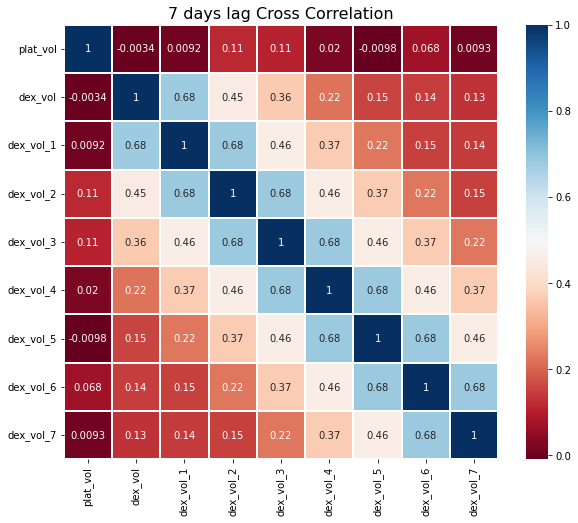

In [19]:
plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation', size=16)

svm = sns.heatmap(df_shifted1.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Nhìn vào Cross Correlation Matrix, có thể thấy Market Volume và Krystal Volume tương quan tốt nhất với tham số lag là 2 và 3 (0.11)

Như vậy, có thể nhận xét rằng xu hướng và biến động của thị trường chung có ảnh hưởng tới khối lượng giao dịch trên sàn Krystal. Và ảnh hưởng xảy ra rõ rệt nhất là sau 2-3 ngày từ khi thị trường chung xảy ra biến động.

### 4. Conclusion

Sau khi phân tích biến động Market Volume và Krystal Volume, ta rút ra các nhận xét và giả thuyết:

#### Trend
Việc suy giảm Krystal Volume có thể bị ảnh hưởng từ xu hướng chung của toàn thị trường. 
<br>Nếu nhìn vào  Market Volume, ta sẽ không nhận ra trend giảm này một cách rõ ràng. Từ đầu năm 2022, Market Volume đi ngang, thậm chí giảm nhẹ, chỉ duy nhất vào khoảng 2022/05/08 có xuất hiện khối lượng giao dịch đột biến (có thể là khối lượng bán tháo của các nhà giao dịch do sự sụp đổ của LUNA).


#### Ouliers
Trên biểu đồ time series Market Volume và Krystal Volume, có xuất hiện các điểm peak (Volume cao đột biến). Và ta có thể tìm ra những khoảng thời gian mà các điểm peak này xuất hiện trùng khớp trên cả 2 biểu đồ:
<ul>
    <li>2022/01/26 - 2022/01/28</li>
    <li>2022/02/24</li>
    <li>2022/05/08</li>
    <li>2022/06/13 - 2022/06/15</li>
</ul>

##### Nhận xét:
<ul>
    <li> Hầu hết mỗi khi Market Volume ghi nhận các điểm tăng đột biến, thì cũng đồng thời xuất hiện điều tương tự trong Krystal Volume.
    <li>Market Volume và Krystal Volume cùng đạt mức rất cao vào giai đoạn 2022/01/26 - 2022/01/28
    <li>Vào thời điểm 2022/05/08 - 2022/05/13 ghi nhận mức Market Volume kỷ lục tính từ đầu năm, thì trên sàn Krystal cũng ghi nhận mức khối lượng giao dịch khá đáng kể.
    <li>Vào các thời điểm cuối T2, T3, T4 khi Krystal Volume đạt mức rất cao, thì Market Volume giữ ở mức khá bình thường. (Giả thiết: Có thể đấy là thời điểm xuất hiện các chiến dịch Marketing, thúc đẩy giao dịch).
</ul>

#### Seasonal
Market Volume và Krystal Volume cùng có pattern tăng mạnh vào khoảng thời gian gần đầu tháng.
<br>Tuy nhiên, đối với Krystal Volume, lại xuất hiện pattern tiếp tục tăng mạnh vào cuối tháng thay vì giảm đều như Market Volume. Có thể sự khác biệt này xuất phát từ các chiến dịch Marketing được tung ra vào thời điểm cuối tháng.

#### Correlation
Với tham số lag là 2-3 ngày, Krystal Volume và Market Volume có hệ số tương quan dương (0.11).
<br>Như vậy, có thể nhận xét rằng xu hướng và biến động của thị trường chung có ảnh hưởng tới khối lượng giao dịch trên sàn Krystal. Và ảnh hưởng xảy ra rõ rệt nhất là sau 2-3 ngày từ khi thị trường chung xảy ra biến động.

## II. Number of Transactions

### 1. Market Number of Transactions

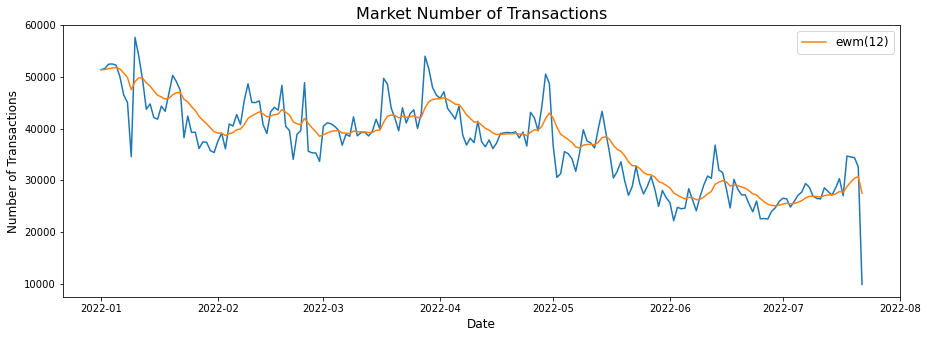

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(df["dex_txn"])
plt.plot(df_ewm["dex_txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Market Number of Transactions", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Nhìn khái quát, Market Number of Transactions đang có xu hướng giảm. Ta nhận thấy có một điểm rơi rất sau vào ngày 2022/07/22. Có thể điểm outlier này xuất hiện bởi dữ liệu giao dịch của ngày này chưa được ghi lại toàn bộ (đây là ngày cuối cùng ghi lại trong bộ dữ liệu).

#### Trend, Seasonal, Error

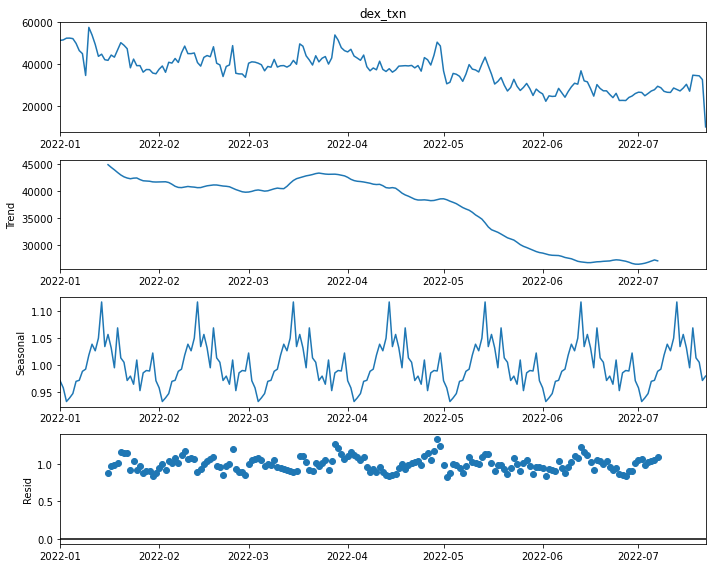

In [21]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['dex_txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Về Trend, Market Number of Transactions có xuất hiện trend giảm. Trend giảm rõ rệt nhất bắt đầu từ t4/2022.

Về Seasonal, Market Number of Transactions có pattern tăng vào khoảng đầu-giữa tháng và giảm dần về cuối tháng.

### 2. Krystal Number of Transactions 

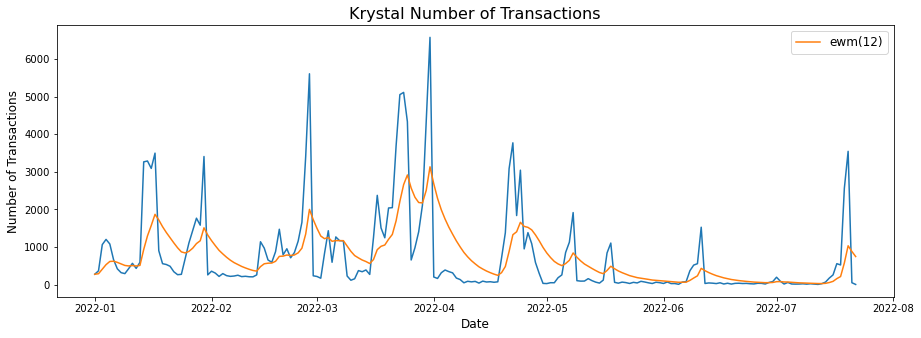

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_txn"])
plt.plot(df_ewm["plat_txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Krystal Number of Transactions", fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [23]:
outlier_idxs=detect_outliers(df["plat_vol"])
print(df.index[outlier_idxs].values)

[datetime.date(2022, 1, 14) datetime.date(2022, 1, 15)
 datetime.date(2022, 1, 16) datetime.date(2022, 1, 17)
 datetime.date(2022, 1, 26) datetime.date(2022, 1, 29)
 datetime.date(2022, 1, 30) datetime.date(2022, 2, 21)
 datetime.date(2022, 2, 24) datetime.date(2022, 2, 26)
 datetime.date(2022, 2, 27) datetime.date(2022, 3, 19)
 datetime.date(2022, 3, 20) datetime.date(2022, 3, 21)
 datetime.date(2022, 3, 29) datetime.date(2022, 3, 30)
 datetime.date(2022, 3, 31) datetime.date(2022, 4, 21)
 datetime.date(2022, 4, 24) datetime.date(2022, 5, 8)
 datetime.date(2022, 6, 11) datetime.date(2022, 7, 19)
 datetime.date(2022, 7, 20)]


#### Ta đã xác định được những khoảng thời gian xuất hiện sự gia tăng Krystal Number of Transactions đột biến là:
<ul>
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/24</li>
    <li>2022/02/24 - 2022/02/27</li>
    <li>2022/03/19 - 2022/03/21</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul> 

#### Trend, Seasonal, Error

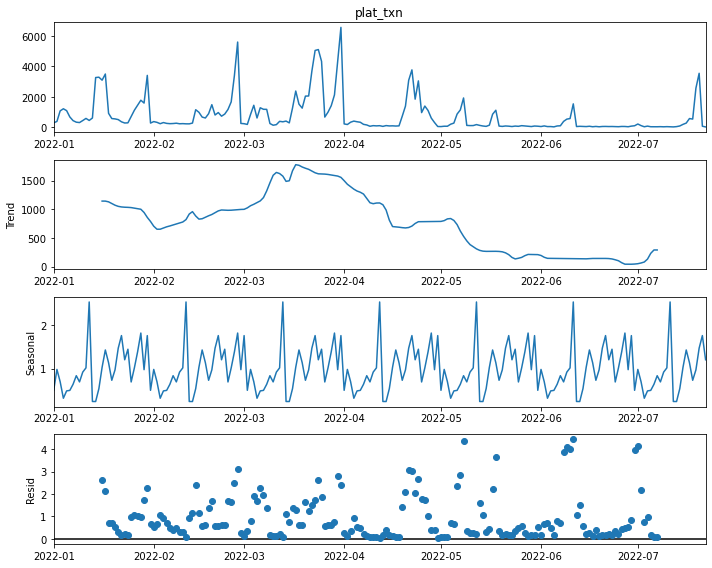

In [24]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Về Trend, Krystal Number of Transactions có xuất hiện trend giảm. Trend giảm rõ rệt nhất bắt đầu từ giữa t3/2022.

Về Seasonal, Krystal Number of Transactions có pattern tăng vào khoảng đầu-giữa tháng, giảm và lại có xu hướng tăng vào cuối tháng.

### 3. Correlation

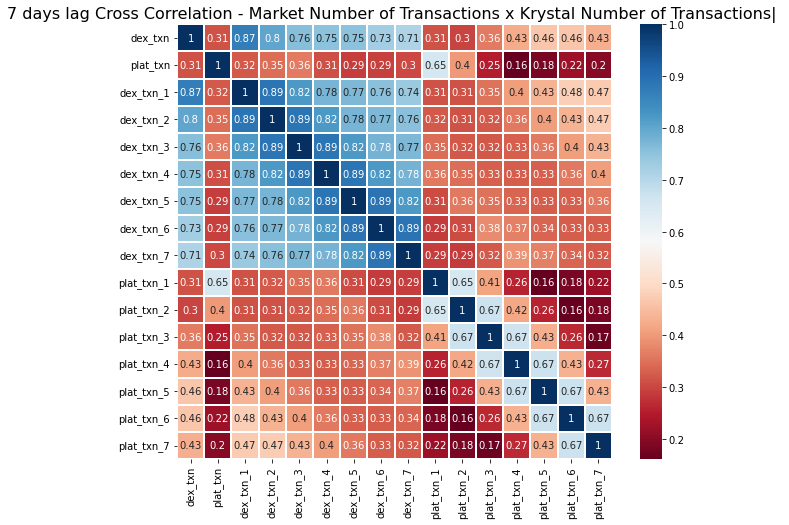

In [25]:
txnn = shift_time(df[['dex_txn', 'plat_txn']], 7)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Market Number of Transactions x Krystal Number of Transactions| ', size=16)
svm = sns.heatmap(txnn.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Nhìn vào Cross Correlation Matrix, có thể thấy Market Number of Transactions và Krystal Number of Transactions tương quan tốt nhất với tham số lag 3 (0.36).

Và bản thân Market Number of Transactions cũng có autocorrelation ở mức cao (biểu đồ Maxtrix Correlation toàn màu xanh), cho thấy rằng chỉ số Số lượng giao dịch khá nhạy cảm với các biến động trong quá khứ. Ta cũng thấy Krystal Number of Transactions có autocorrelation ở mức lag=1 khá cao (0.65), càng cho ta chắc chắn về giả thuyết trên.

Tuy nhiên hệ số Cross Correlation của Krystal Number of Transactions ở các mức lag 1-7 so với Market lại ổn định hơn so với biến động của chính nó trong quá khứ. Nên có thể cho rằng, dư địa ảnh hưởng của Market là lâu hơn.

### 4. Conclusion

Sau khi phân tích biến động Market Number of Transactions và Krystal Number of Transactions, ta rút ra các nhận xét và giả thuyết:

#### Trend
Nếu chỉ phân tích Volume của Market và của sàn Krystal, ta chưa thể nhận thấy sự tương quan rõ ràng thì khi phân tích Number of Transactions thì ta đã có thể tin tưởng hơn vào giả thuyết, bởi các nhận xét sau: 
<ul>
    <li>Market Number of Transactions và Krystal Number of Transactions có sự đồng pha giảm.
    <li>Trend giảm thể hiện rõ rệt nhất từ thời điểm t4/2022 trở đi
</ul>

#### Ouliers
Vì Market Number of Transactions chỉ xuất hiện duy nhất 1 outlier đáng lưu ý ở ngày 2022/07/22 (có lẽ phần lớn là do lỗi ghi dữ liệu). Nên ta sẽ xem xét những thời điểm xảy ra Market Volume tăng đột biến, và xem xét Number of Transactions trên sàn Krystal vào thời điểm đó.
###### Market Volume peak:
<ul>    
    <li>2022/01/07: số lượng giao địch đạt mức trung bình</li>
    <li>2022/01/21 - 2022/01/24: số lượng giao địch đạt mức cao</li>
    <li>2022/01/26 - 2022/01/28: số lượng giao địch đạt mức cao</li>
    <li>2022/02/24: số lượng giao địch đạt mức cao</li>
    <li>2022/05/08 - 2022/05/13: số lượng giao địch đạt trên mức trung bình</li>
    <li>2022/06/13 - 2022/06/15: số lượng giao dịch đạt mức trung bình</li>
    <li>2022/07/22</li>
</ul>

##### Krystal Number of Transactions:
<ul>    
    <li>2022/01/14 - 2022/01/17</li>
    <li>2022/01/26 - 2022/01/30</li>
    <li>2022/02/24</li>
    <li>2022/02/24 - 2022/02/27</li>
    <li>2022/03/19 - 2022/03/21</li>
    <li>2022/03/29 - 2022/03/31</li>
    <li>2022/04/21 - 2022/04/24</li>
    <li>2022/05/08</li>
    <li>2022/06/11</li>
    <li>2022/07/19 - 2022/07/20</li>
</ul>
    
##### Nhận xét:
<ul>
    <li> Hầu hết mỗi khi Market Volume ghi nhận các điểm tăng đột biến, thì số lượng giao dịch trên sàn Krystal đều đạt mức cao hoặc trung bình/trên trung bình.
    <li>Vào thời điểm 2022/05/08 - 2022/05/13 ghi nhận mức Market Volume kỷ lục tính từ đầu năm, thì trên sàn Krystal cũng ghi nhận mức số lượng giao dịch trên trung bình. (Có thể những nhà giao dịch trên sàn Krystal phản ứng khá nhẹ nhàng so với sự sụp đổ của thị trường chung).
    <li>Vào các thời điểm khi Krystal Number of Transactions đạt mức rất cao, thì Market Volume giữ ở mức khá bình thường. Thậm chí có những thời điểm Krystal Number of Transactions còn tăng đột biến trước 2-3 ngày so với Market Volume. (Giả thiết: Có thể đấy là thời điểm xuất hiện các chiến dịch Marketing, thúc đẩy giao dịch). 
</ul>

#### Seasonal
Market Number of Transactions và Krystal Number of Transactions cùng có pattern tăng mạnh vào khoảng thời gian gần đầu tháng.
<br>Tuy nhiên, đối với Krystal Volume, lại xuất hiện pattern tiếp tục tăng mạnh vào cuối tháng thay vì giảm đều như Market Volume. Có thể sự khác biệt này xuất phát từ các chiến dịch Marketing được tung ra vào thời điểm cuối tháng.

#### Correlation
Với tham số lag là 3 ngày, Krystal Number of Transactions và Market Number of Transactions có hệ số tương quan dương khá cao (0.36).
<br>Như vậy, có thể nhận xét rằng khi số lượng giao dịch trên thị trường giảm, thì trên sàn Krystal cũng ghi nhận điều tương tự. Và ảnh hưởng xảy ra rõ rệt nhất là sau 3 ngày từ khi thị trường chung xảy ra biến động.
<br>Và bản thân Market Number of Transactions cũng có autocorrelation ở mức cao (biểu đồ Maxtrix Correlation toàn màu xanh), cho thấy rằng chỉ số Số lượng giao dịch khá nhạy cảm với các biến động trong quá khứ. Ta cũng thấy Krystal Number of Transactions có autocorrelation ở mức lag=1 khá cao (0.65), càng cho ta chắc chắn về giả thuyết trên.
<br>Tuy nhiên hệ số Cross Correlation của Krystal Number of Transactions ở các mức lag 1-7 so với Market lại ổn định hơn so với biến động của chính nó trong quá khứ. Nên có thể cho rằng, dư địa ảnh hưởng của Market là lâu hơn.


## III. Average Volume per Transaction

### 1. Market  AVG Volume per Transaction

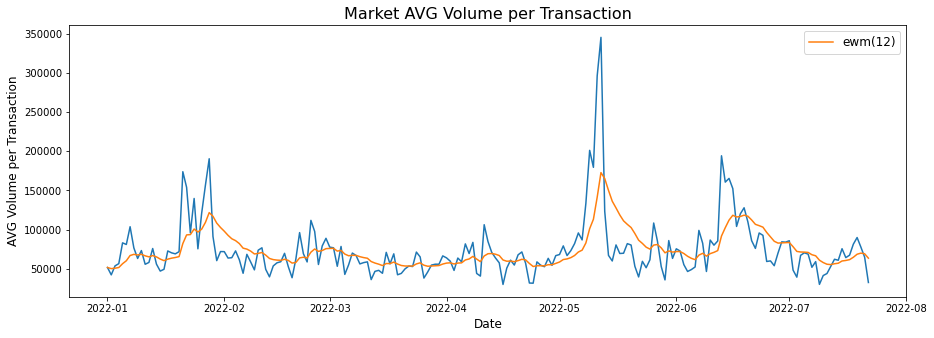

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(df["dex_vol/txn"])
plt.plot(df_ewm["dex_vol/txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("AVG Volume per Transaction", fontsize=12)
plt.title("Market AVG Volume per Transaction", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Market AVG Volume per Transaction có biến động rất giống với Market Volume

In [27]:
df[['dex_vol', 'dex_vol/txn']].corr()

,dex_vol,dex_vol/txn
dex_vol,1.000000,0.924878
dex_vol/txn,0.924878,1.000000


Hệ số Correlation giữa Market AVG Volume per Transaction và Market Volume thậm chí cho ra kết quả rất cao (0.92), cho thấy sự 'giống nhau' của 2 time series này.

### 2. Krystal AVG Volume per Transaction

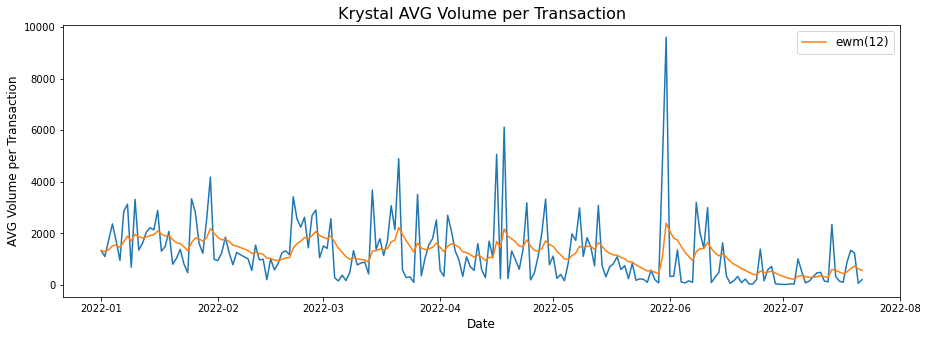

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol/txn"])
plt.plot(df_ewm["plat_vol/txn"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("AVG Volume per Transaction", fontsize=12)
plt.title("Krystal AVG Volume per Transaction", fontsize=16)
plt.legend(fontsize=12)
plt.show()

#### Trend, Seasonal, Error

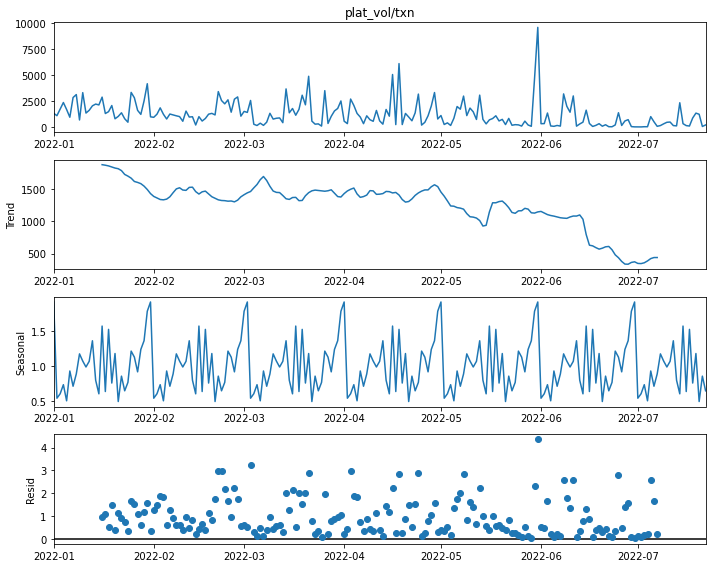

In [29]:
plt.rcParams.update({'figure.figsize': (10,8)})
decompose = seasonal_decompose(df['plat_vol/txn'],model='multiplicative', period=30)
decompose.plot()
plt.show()

Về Trend, Krystal AVG Volume per Transaction có xu hướng đi ngang và giảm nhẹ từ đầu 2022 đến t5/2022, và bắt đầu xuất hiện đà giảm mạnh hơn từ đây.

In [30]:
df[['plat_vol', 'plat_vol/txn']].corr()

,plat_vol,plat_vol/txn
plat_vol,1.000000,0.452959
plat_vol/txn,0.452959,1.000000


### 3. Correlation

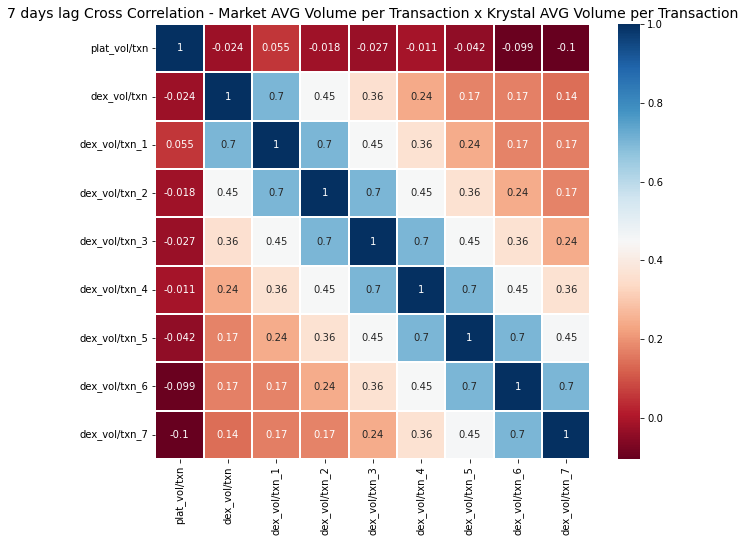

In [31]:
dex_vol_txn_shifted = shift_time(df[['dex_vol/txn']], 7)
df_shifted3 = pd.concat([df[['plat_vol/txn']], dex_vol_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Market AVG Volume per Transaction x Krystal AVG Volume per Transaction', size=14)
svm = sns.heatmap(df_shifted3.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market AVG Volume per Transaction và Krystal AVG Volume per Transaction có hệ số Correlation khá thấp (xấp xỉ 0) bất kể tham số lag nào.

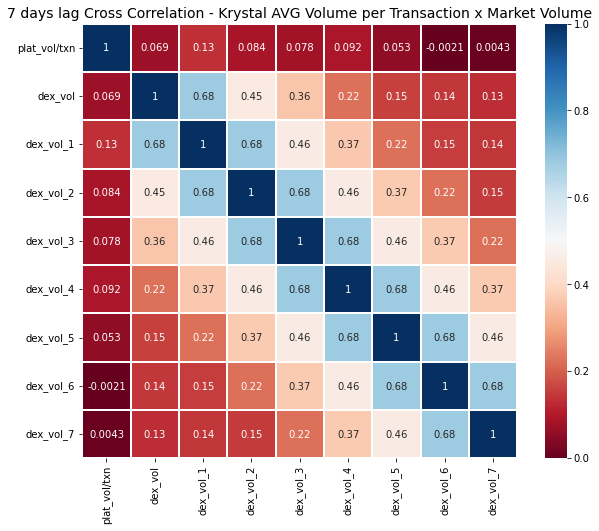

In [32]:
dex_vol = shift_time(df[['dex_vol']], 7)
df_shifted10 = pd.concat([df[['plat_vol/txn']], dex_vol], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Krystal AVG Volume per Transaction x Market Volume', size=14)
svm = sns.heatmap(df_shifted10.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market AVG Volume per Transaction và Krystal AVG Volume per Transaction có hệ số Correlation dương cao nhất là 0.13 ở mức lag = 1

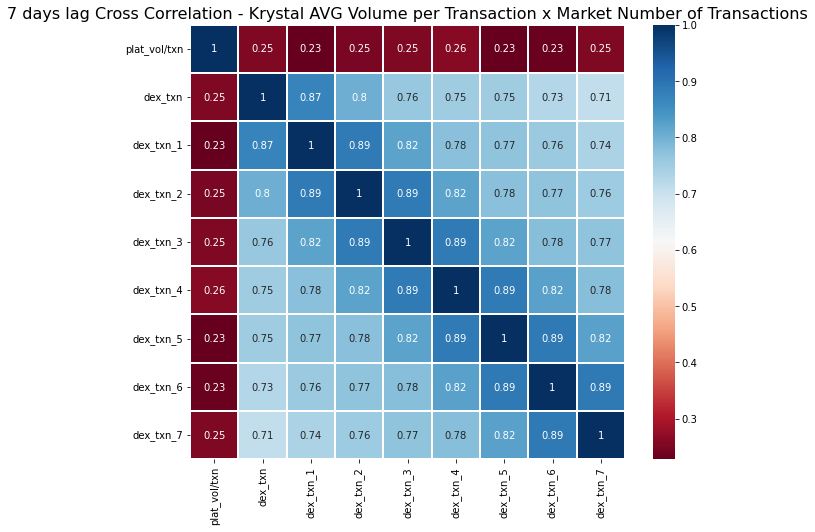

In [33]:
dex_txn = shift_time(df[['dex_txn']], 7)
df_shifted11 = pd.concat([df[['plat_vol/txn']], dex_txn], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Krystal AVG Volume per Transaction x Market Number of Transactions', size=16)
svm = sns.heatmap(df_shifted11.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Market Number of Transactions và Krystal AVG Volume per Transaction có hệ số Correlation lại có hệ số Correlation khá tốt ở tất cả các mức lag 1-7 (0.23 - 0.26).

### 4. Conclusion

Sau khi phân tích biến động Market AVG Volume per Transaction và Krystal AVG Volume per Transaction, ta rút ra các nhận xét và giả thuyết:

#### Trend
Nếu giữa Market Volume và Market AVG Volume per Transaction có sự tương quan rất cao (0.92), thì giữa Krystal Volume và Krystal AVG Volume per Transaction sự tương quan khiêm tốn hơn (0.45).
<br>Về mặt đồ thị, biểu đồ Trend của Krystal Volume và Krystal AVG Volume per Transaction cũng cho thấy độ 'mịn' (ít biến động) hơn so với biểu đồ trend của Market AVG Volume per Transaction.

##### Giả thuyết:
<ul>
    <li>Market AVG Volume per Transaction biểu diễn biến động của toàn bộ Market, nơi tập trung tất cả các nhà giao dịch từ cá mập cho tới những traders nhỏ lẻ. Cho nên số tiền giao dịch của họ là rất khác nhau. Và khi cộng tổng các giao dịch trong ngày lại, Market Volume per Transaction cũng phản ánh giống với Market Volume.</li>
    <li>Còn đối với sàn Krystal, nơi chỉ tập trung một số/nhóm nhà giao dịch nhất định, có hành vi/hình thức/loại hình giao dịch phụ thuộc nhiều vào biểu giá dịch vụ, thuế, commission, khuyến mãi, marketing,... Cho nên trên sàn Krystal, AVG Volume per Transaction không mang tính tổng quát và bám sát tổng Volume như so với với Market.</li>
    <li>Có 1 điểm bất thường là cuối t6/2022, Krystal AVG Volume per Transaction đạt mức cao đột biến (kỷ lục), trong khi Krystal Volume và Krystal Number of Transactions thời điểm này lại chỉ đạt mức rất thấp, thậm chí chạm ngưỡng Min ????
</ul>

#### Correlation
Market Volume per Transaction và Krystal Volume per Transaction có hệ số Correlation khá thấp (xấp xỉ 0) bất kể tham số lag nào.
<br>Như vậy, có thể nhận xét rằng Market Volume per Transaction và Krystal Volume per Transaction không có sự tương quan đáng kể.
<br>Tuy nhiên, Market Number of Transactions và Krystal AVG Volume per Transaction có hệ số Correlation lại có hệ số Correlation khá tốt ở tất cả các mức lag 1-7 (0.23 - 0.26). Và như đã phân tích các chỉ số khác ở trên, ta cũng nhận thấy Market Number of Transactions có ảnh hưởng lớn và dư địa ảnh hưởng lâu nhất với lượng giao dịch trên sàn Krystal.

## IV. Krystal Wallets

### 1. Unique Wallets Number

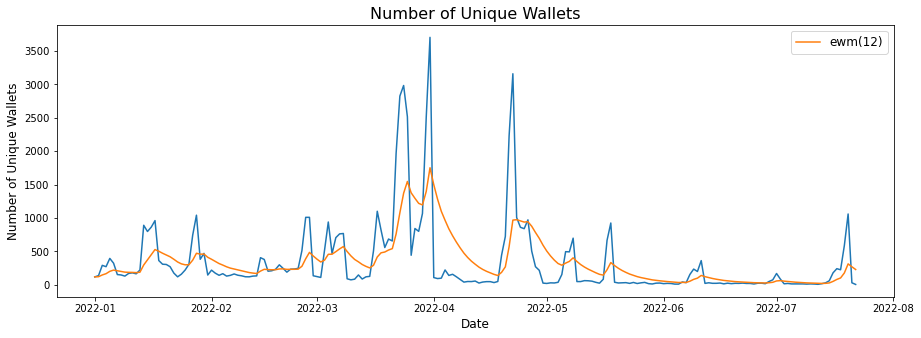

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(df["unique_wal"])
plt.plot(df_ewm["unique_wal"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Unique Wallets", fontsize=12)
plt.title("Number of Unique Wallets", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Number of Unique Wallets có xu hướng tăng từ đầu năm 2022, đạt đỉnh vào t4/2022, sau đó giảm dần cho tới hiện tại.

In [35]:
df[[ 'unique_wal', 'plat_vol', 'plat_txn']].corr()

,unique_wal,plat_vol,plat_txn
unique_wal,1.000000,0.529360,0.895349
plat_vol,0.529360,1.000000,0.786273
plat_txn,0.895349,0.786273,1.000000


Number of Unique Wallets, Krystal Volume, Krystal Number of Transactions có tương quan khá tốt, lần lượt là 0.52 và 0.89.
<br>Thật vậy, vào thời điểm Krystal Volume đạt đỉnh (cuối t4/2022) thì Number of Unique Wallets cũng đạt đỉnh, trong khi đó Market Volume thời điểm này chỉ đạt mức bình thường. Có thể đây là thời điểm Marketing Compaign đạt hiệu quả rất cao và thu hút được nhiều người dùng mới.

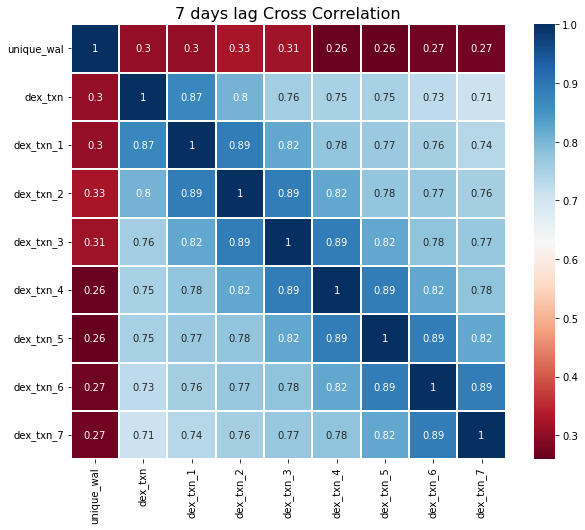

In [36]:
dex_txn_shifted = shift_time(df[['dex_txn']], 7)
df_shifted4 = pd.concat([df[['unique_wal']], dex_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation', size=16)
svm = sns.heatmap(df_shifted4.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Number of Unique Wallets và Market Number of Transactions có tương quan dương khá cao (0.33) tại tham số lag=2. Có thể vào thời điểm Market sôi nổi với mức giao dịch cao, thì khả năng khách hàng mở Wallet mới cũng cao hơn.

### 2. Average Volume per Wallet

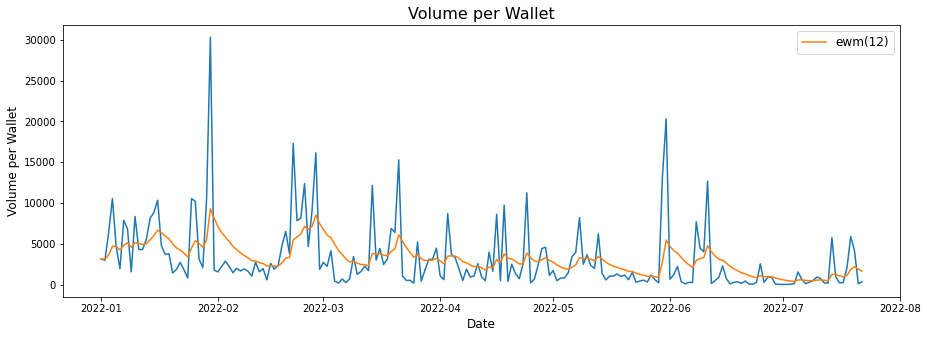

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(df["plat_vol/wallet"])
plt.plot(df_ewm["plat_vol/wallet"], label="ewm(12)")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume per Wallet", fontsize=12)
plt.title("Volume per Wallet", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Average Volume per Wallet cũng xuất hiện Trend giảm.

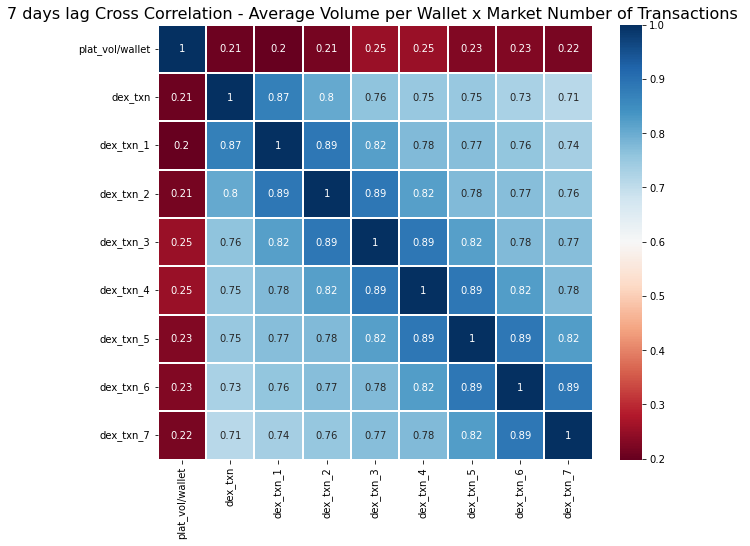

In [38]:
dex_txn_shifted = shift_time(df[['dex_txn']], 7)
df_shifted5 = pd.concat([df[['plat_vol/wallet']], dex_txn_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Average Volume per Wallet x Market Number of Transactions ', size=16)
svm = sns.heatmap(df_shifted5.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Average Volume per Wallet x Market Number of Transactions có hệ số Correlation khá tốt ở tất cả các mức lag 1-7, cao nhất ở lag=3 với Coef=0.25

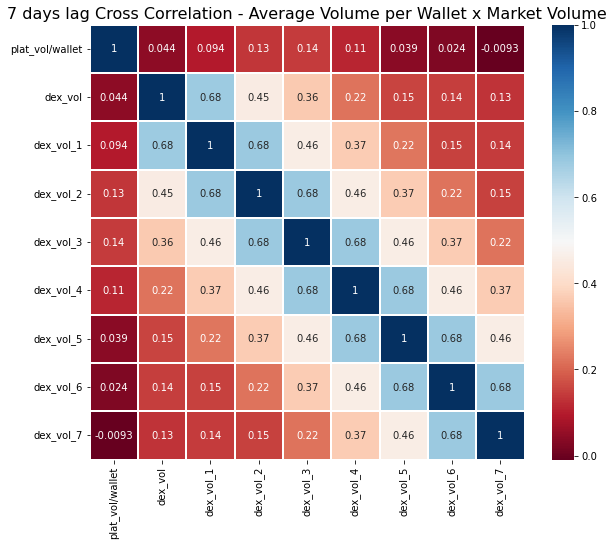

In [39]:
dex_vol_shifted = shift_time(df[['dex_vol']], 7)
df_shifted6 = pd.concat([df[['plat_vol/wallet']], dex_vol_shifted], axis=1)

plt.figure(figsize=(10, 8))
plt.title('7 days lag Cross Correlation - Average Volume per Wallet x Market Volume', size=16)
svm = sns.heatmap(df_shifted6.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

Average Volume per Wallet và Market Volume đạt Correlation cao nhất là 0.13-0.14 tại mức lag = 2-3.

## V. Conclusion

#### Thông qua việc phân tích, ta có thể kết luận và đưa ra các giả thiết sau:
##### Kết luận:
<ul>
    <li>Xu hướng và các biến động của thị trường có tác động tới sự suy giảm Khối lượng giao dịch và các chỉ số khác trên sàn Krystal.</li>
    <li>Yếu tố của Market ảnh hưởng lớn nhất tới lượng giao dịch của sàn Krystal là Number of Transactions.</li>
    <li>Nếu sàn Krystal phản ứng với biến động Market Volume rõ rệt và nhiều nhất với mức tham số trượt là 2-3 ngày (Krystal chạy sau Market 2-3 ngày), thì Market Number of Transactions lại có mức ảnh hưởng lớn hơn, nhanh hơn và dư địa ảnh hưởng cũng lâu hơn.</li>
</ul>

##### Giả thiết:
<ul>
    <li>Có những thời điểm Sàn Krystal đạt mức Transaction Volume, và các chỉ số khác tăngột biến trong khi chỉ số Market chỉ giữ ở mức bình thường. Có thể đây là thời điểm Krystal có những chiến dịch Marketing hiệu quả.</li>
    <li>Sàn Krystal là nơi chỉ tập trung một số/nhóm nhà giao dịch nhất định, có hành vi/hình thức/loại hình giao dịch phụ thuộc nhiều vào biểu giá dịch vụ, thuế, commission, khuyến mãi, marketing,... Cho nên trên sàn Krystal, các chỉ số không mang tính tổng quát và bám sát với những biến động lớn như so với các chỉ số chung của toàn Market.</li>
</ul>